<a href="https://colab.research.google.com/github/sanjanareddyd9/aiml_preconference/blob/main/preconference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle


In [2]:
!mkdir ~/.kaggle


In [3]:
!cp kaggle.json ~/.kaggle


In [4]:
! kaggle download -d saumyamohandas/garbage-classification-image-dataset

usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,models,m,files,f,config} ...
kaggle: error: argument command: invalid choice: 'download' (choose from 'competitions', 'c', 'datasets', 'd', 'kernels', 'k', 'models', 'm', 'files', 'f', 'config')


In [5]:
!unzip /content/archive.zip

Archive:  /content/archive.zip
  inflating: dataset/Testing/cardboard/cardboard337.jpg  
  inflating: dataset/Testing/cardboard/cardboard338.jpg  
  inflating: dataset/Testing/cardboard/cardboard339.jpg  
  inflating: dataset/Testing/cardboard/cardboard340.jpg  
  inflating: dataset/Testing/cardboard/cardboard341.jpg  
  inflating: dataset/Testing/cardboard/cardboard342.jpg  
  inflating: dataset/Testing/cardboard/cardboard343.jpg  
  inflating: dataset/Testing/cardboard/cardboard344.jpg  
  inflating: dataset/Testing/cardboard/cardboard345.jpg  
  inflating: dataset/Testing/cardboard/cardboard346.jpg  
  inflating: dataset/Testing/cardboard/cardboard347.jpg  
  inflating: dataset/Testing/cardboard/cardboard348.jpg  
  inflating: dataset/Testing/cardboard/cardboard349.jpg  
  inflating: dataset/Testing/cardboard/cardboard350.jpg  
  inflating: dataset/Testing/cardboard/cardboard351.jpg  
  inflating: dataset/Testing/cardboard/cardboard352.jpg  
  inflating: dataset/Testing/cardboard/ca

In [6]:
from keras.models import Sequential
from keras.layers import Convolution2D,Flatten,Dense,MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

In [7]:
train_datagen=ImageDataGenerator(horizontal_flip=True,rescale=1./255,zoom_range=0.2)
#rescale=1./255 means transform every pixel value from range [0,255] -> [0,1].

In [8]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [9]:
X_train=train_datagen.flow_from_directory("/content/dataset/Training",target_size=(128,128),batch_size=4)

Found 2508 images belonging to 6 classes.


In [10]:
X_test=test_datagen.flow_from_directory("/content/dataset/Testing",target_size=(128,128),class_mode='categorical',batch_size=4)

Found 464 images belonging to 6 classes.


In [11]:
#ModelBuilding
model=Sequential()

In [12]:
#1)convolution layer
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))

In [13]:
#1)maxpooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

In [14]:
#2)convolution layer
model.add(Convolution2D(32,(3,3),activation='relu'))

In [15]:
#2)maxpooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

In [16]:
#Flatten layer
model.add(Flatten())

In [17]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
Total params: 10144 (39.62 KB)
Trainable params: 10144 (

In [18]:
model.add(Dense(300,activation='relu'))#hidden layer
model.add(Dense(150,activation='relu'))#hidden layer
model.add(Dense(6,activation='softmax'))#output layer

In [19]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

In [20]:
# training the model
model.fit_generator(X_train,steps_per_epoch=len(X_train),epochs=30,validation_data=X_test,validation_steps=len(X_test))


Epoch 1/30


<ipython-input-20-9487c4c2cd48>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(X_train,steps_per_epoch=len(X_train),epochs=30,validation_data=X_test,validation_steps=len(X_test))


627/627 [==============================] - 27s 35ms/step - loss: 1.7700 - accuracy: 0.2249 - val_loss: 1.6350 - val_accuracy: 0.3405
Epoch 2/30
627/627 [==============================] - 16s 26ms/step - loss: 1.6228 - accuracy: 0.3130 - val_loss: 1.5172 - val_accuracy: 0.3793
Epoch 3/30
627/627 [==============================] - 17s 26ms/step - loss: 1.4839 - accuracy: 0.3840 - val_loss: 1.4641 - val_accuracy: 0.4375
Epoch 4/30
627/627 [==============================] - 16s 25ms/step - loss: 1.3821 - accuracy: 0.4230 - val_loss: 1.3769 - val_accuracy: 0.4871
Epoch 5/30
627/627 [==============================] - 17s 26ms/step - loss: 1.2649 - accuracy: 0.4936 - val_loss: 1.3553 - val_accuracy: 0.4892
Epoch 6/30
627/627 [==============================] - 16s 25ms/step - loss: 1.1601 - accuracy: 0.5459 - val_loss: 1.3689 - val_accuracy: 0.5366
Epoch 7/30
627/627 [==============================] - 17s 27ms/step - loss: 1.0733 - accuracy: 0.5929 - val_loss: 1.2336 - val_accuracy: 0.5690
Epo

In [21]:
model.save('garbage.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [22]:
#testing
import numpy as np
from keras.preprocessing import image

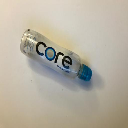

In [23]:
img = image.load_img('/content/dataset/Testing/plastic/plastic266.jpg',target_size =(128,128))
img

In [24]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred = np.argmax(model.predict(x))
op =['cardboard','glass','metal','paper','trash','plastic']
op[pred]

1/1 [==============================] - 0s 249ms/step


'plastic'

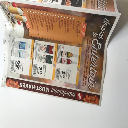

In [25]:
#testing 2
img = image.load_img('/content/dataset/Testing/paper/paper481.jpg',target_size =(128,128))
img

In [26]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred = np.argmax(model.predict(x))
op =['cardboard','glass','metal','paper','trash','plastic']
op[pred]

1/1 [==============================] - 0s 18ms/step


'plastic'

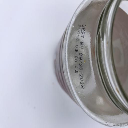

In [27]:
#testing 3
img = image.load_img('/content/dataset/Testing/glass/glass400.jpg',target_size =(128,128))
img

In [28]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred = np.argmax(model.predict(x))
op =['cardboard','glass','metal','paper','trash','plastic']
op[pred]

1/1 [==============================] - 0s 19ms/step


'paper'